In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 256
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-sindhi'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

منهنجو هي آرلينڊو ۾ مئل ۽ زخمين جي دوستن ۽ ڪٽنب لاءِ درد آهي...senseless #orlandohorror #prayers 0
هن هفتي جي آخر ۾ اسان جي نئين گهر ۾ منتقل ٿيڻ جو انتظار نٿو ڪري سگھجي ð borda ⁇ « ۽ هڪ هفتي لاءِ ð ⁇  @user â ⁇ ¤aytâ ⁇ ¤ay attâ ⁇ ¤ait 0
#صفائي # جڳھون. ٺاھڻ # منهن.  0
رستي تي اتحادي پالي #boxcup @user @user @user @user  0
مھرباني ڪري فالو ڪريو https://t.co/rC6EFF0AVH 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

منهنجو آرلينڊو ۾ مئل زخمين جي دوستن ڪٽنب لاءِ درد آهيsenseless 0
هن هفتي جي ۾ اسان جي نئين گهر ۾ منتقل جو انتظار نٿو ڪري سگھجي ð borda ⁇ « هفتي لاءِ ð ⁇ â ⁇ ¤aytâ ⁇ ¤ay attâ ⁇ ¤ait 0
جڳھون ٺاھڻ منهن 0
رستي اتحادي پالي 0
مھرباني ڪري فالو ڪريو 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 9/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.12it/s, loss=0.487]


Train loss 0.503018462059953 accuracy 0.7473192469837572
Validation loss 0.4118328273875042 accuracy 0.8052791492593999
Model and tokenizer saved at epoch 9
Checkpoint saved: Improved validation accuracy at epoch 9: 0.8052791492593999
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.11it/s, loss=0.469]


Train loss 0.40702205616679393 accuracy 0.8103153603666333
Validation loss 0.38949206297837413 accuracy 0.8195214584124573
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.8195214584124573
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 309/309 [01:40<00:00,  3.09it/s, loss=0.438]


Train loss 0.38064851228473257 accuracy 0.8243299699958222
Validation loss 0.38383223535945116 accuracy 0.825484238511204
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.825484238511204
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 309/309 [01:40<00:00,  3.08it/s, loss=0.405]


Train loss 0.3608982428956572 accuracy 0.8330147235691046
Validation loss 0.37337255998722557 accuracy 0.8326623623243449
Model and tokenizer saved at epoch 12
Checkpoint saved: Improved validation accuracy at epoch 12: 0.8326623623243449
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 309/309 [01:40<00:00,  3.06it/s, loss=0.423]


Train loss 0.3400795791527214 accuracy 0.8450670346503943
Validation loss 0.3778723342326081 accuracy 0.8363463729586024
Model and tokenizer saved at epoch 13
Checkpoint saved: Improved validation accuracy at epoch 13: 0.8363463729586024
Metrics logged at epoch 13
Epoch 14/50
----------


Training Progress: 100%|██████████| 309/309 [01:38<00:00,  3.14it/s, loss=0.37] 


Train loss 0.3242191519937855 accuracy 0.8539163681018876
Validation loss 0.3801678245507398 accuracy 0.839384732244588
Model and tokenizer saved at epoch 14
Checkpoint saved: Improved validation accuracy at epoch 14: 0.839384732244588
Metrics logged at epoch 14
Epoch 15/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.09it/s, loss=0.373]


Train loss 0.3097746076610868 accuracy 0.860056463558217
Validation loss 0.38378848005267024 accuracy 0.8334219521458412
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 15
Epoch 16/50
----------


Training Progress: 100%|██████████| 309/309 [01:38<00:00,  3.13it/s, loss=0.347]


Train loss 0.29341923004215203 accuracy 0.8683867373938143
Validation loss 0.3901582149047296 accuracy 0.838321306494493
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 16
Epoch 17/50
----------


Training Progress: 100%|██████████| 309/309 [01:40<00:00,  3.07it/s, loss=0.349]


Train loss 0.2814372039632118 accuracy 0.8748180126346706
Validation loss 0.410833721311347 accuracy 0.8320926699582226
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 17
Epoch 18/50
----------


Training Progress: 100%|██████████| 309/309 [01:39<00:00,  3.09it/s, loss=0.338]


Train loss 0.27251040906582064 accuracy 0.8767549912013065
Validation loss 0.42743471612050693 accuracy 0.82631978731485
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 18
Epoch 19/50
----------


Training Progress: 100%|██████████| 309/309 [01:41<00:00,  3.05it/s, loss=0.337]


Train loss 0.25797306536470804 accuracy 0.8839078859081644
Validation loss 0.4263556541748417 accuracy 0.8378275731105204
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


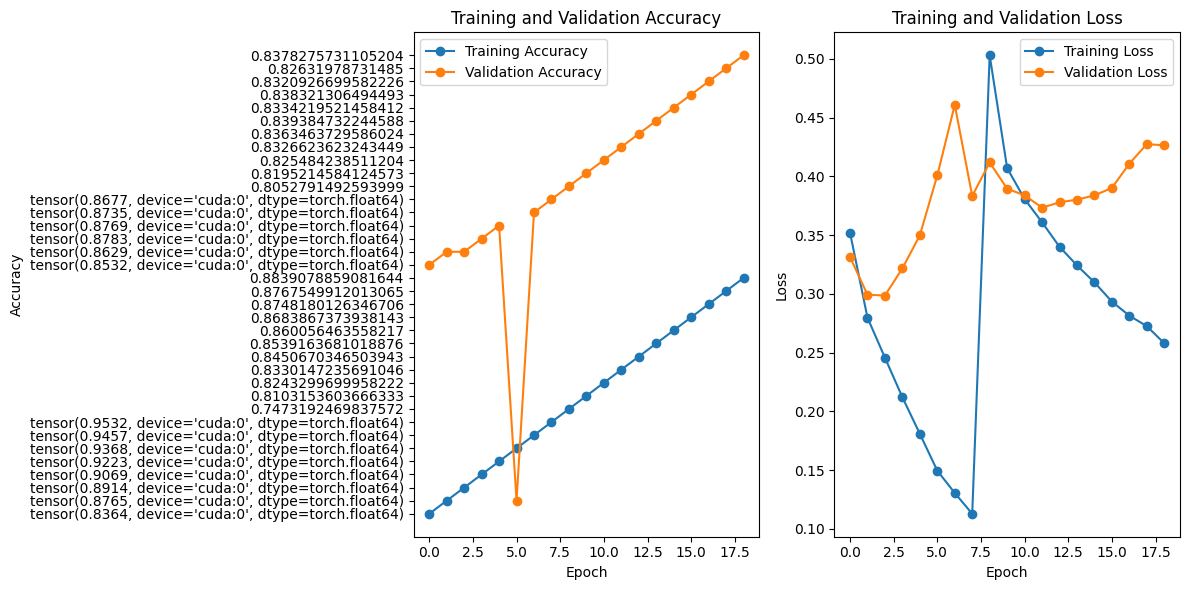

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.8348271933156096 Test Loss: 0.4334771662082487


Accuracy: 0.83
F1 Score: 0.78
Precision: 0.74
Recall: 0.82

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.90      0.84      0.87     17127
        Hate       0.74      0.82      0.78      9203

    accuracy                           0.83     26330
   macro avg       0.82      0.83      0.82     26330
weighted avg       0.84      0.83      0.84     26330



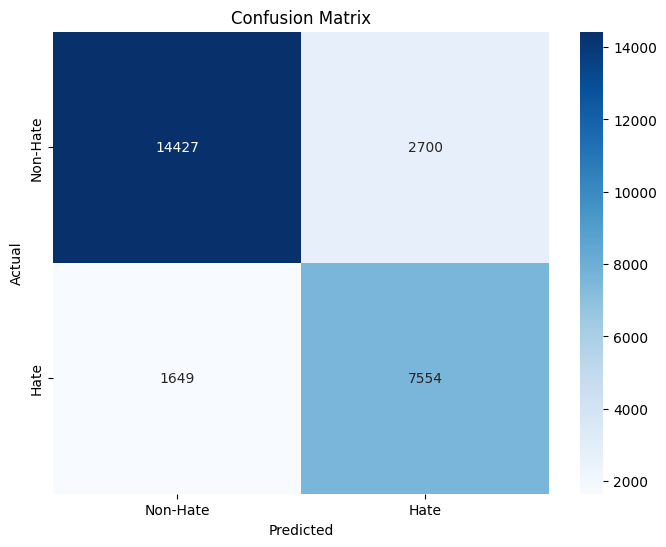

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.99
